In [75]:
import matplotlib.pyplot as plt
#import dccp
#import cvxpy
import pandas as pd
import math
import scipy.stats
import numpy as np

In [82]:
x = np.arange(-2,3)
Upper, Lower = x + 0.5, x - 0.5 
List_newxy = scipy.stats.norm.cdf(Upper, scale = 3) - scipy.stats.norm.cdf(Lower, scale = 3)
List_newxy = List_newxy / List_newxy.sum()
palms = np.random.choice(x, size = 10, p = List_newxy)
Circ=[abs(i) for i in list(palms)]
Circ.sort()
Circ=Circ[-1::-1]
def condition1(x,y,r,s):
    return x+r<=s and x-r>=0 and y+r<=s and y-r>=0
def condition2(x1,y1,r1,x2,y2,r2):
    distSq,radOD_SULSq = (x1 - x2) * (x1 - x2) + (y1 - y2) * (y1 - y2),(r1 + r2) * (r1 + r2); 
    if (distSq == radOD_SULSq):return 1
    elif (distSq > radOD_SULSq):return 1
    else:return 0
def compute(Circ):
    OD_SUL=0
    for i in Circ:
        OD_SUL+=2*i*i
    return OD_SUL
newxy,Vals,sij,palm=[(Circ[0],Circ[0],Circ[0])],[(Circ[0],Circ[0])],math.ceil(math.sqrt(compute(Circ))),len(Circ)
Circ.remove(Circ[0])
while(len(Vals)!=palm):
    zola,kota=[],0
    while(kota<len(Circ)):
        f=0
        if(len(Circ)==0):break
        for i in list(np.arange(1,sij,0.1)):
            for j in list(np.arange(1,sij,0.1)):
                if((i,j) not in Vals and condition1(i,j,Circ[kota],sij)):
                    if(0 not in [condition2(i,j,Circ[kota],u[0],u[1],u[2]) for u in newxy]):
                        newxy.append((i,j,Circ[kota]))
                        Vals.append((i,j))
                        zola.append(Circ[kota])
                        Circ.remove(Circ[kota])
                        if(len(Circ)==0):break
                        f=1
                        kota=0
                if(len(Circ)==0):break
            if(len(Circ)==0):break
        if(f==0):sij+=0.1
        if(len(Circ)==0):break
        kota+=1
print("Final:")
print(newxy)

Final:
[(2, 2, 2), (1.0, 4.900000000000004, 1), (3.0000000000000018, 4.900000000000004, 1), (4.600000000000003, 3.500000000000002, 1), (4.900000000000004, 1.0, 1), (5.0000000000000036, 5.5000000000000036, 1), (1.0, 3.8000000000000025, 0), (1.0, 3.9000000000000026, 0), (7.400000000000006, 7.300000000000006, 2), (7.500000000000005, 2.5000000000000013, 2)]


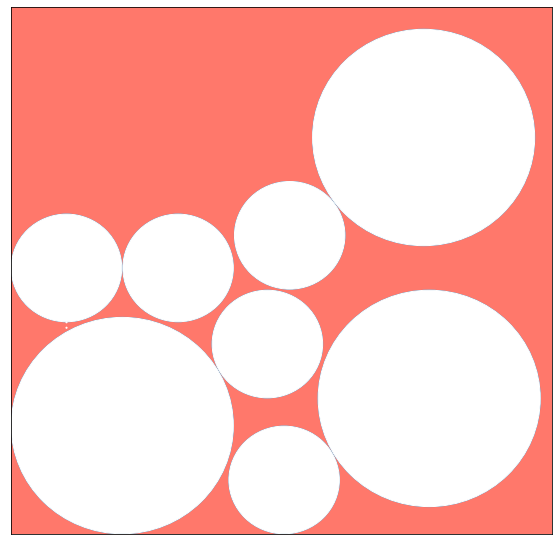

In [83]:
fig, ax = plt.subplots(figsize=(sij, sij))
plt.xlim([0, sij])
plt.ylim([0, sij])
for i in newxy:
    c1 = plt.Circle((i[0], i[1]), i[2])
    c2 = plt.Circle((i[0], i[1]),i[2]-0.01,color='White')
    ax.add_patch(c1)
    ax.add_patch(c2)
ax.set_facecolor('xkcd:salmon')
ax.set_facecolor((1.0, 0.47, 0.42))
plt.xticks([])
plt.yticks([])
plt.show()